# 🌍 Global Economic Analysis (World Bank Dataset)

This notebook explores **global economic indicators** using the World Bank dataset.  
We aim to analyze trends in GDP, inflation, unemployment, public debt, and other key macroeconomic metrics across countries.  

The workflow will include:  
- Data loading & inspection  
- Data cleaning & handling missing values  
- Exploratory Data Analysis (EDA)  
- Visual insights on economic performance 

1.  Import Libraries

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and display options
sns.set(style="whitegrid")
pd.set_option("display.float_format", "{:,.2f}".format)

2. Load dataset

In [2]:
# Load World Bank dataset
df = pd.read_csv("../data/world_bank_data_2025.csv")

# Quick check: shape and first rows
print("Shape:", df.shape)
df.head()

Shape: (3472, 16)


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.08,"2,453,597,206.70","24,093.14",NaN,11.67,-1.22,-2.73,-18.75,NaN,NaN,NaN,"2,313,385,195.53",NaN
1,Aruba,aw,2011,4.32,"2,637,859,217.88","25,712.38",NaN,4.80,4.01,3.37,-9.88,NaN,NaN,NaN,"2,391,841,396.65",NaN
2,Aruba,aw,2012,0.63,"2,615,208,379.89","25,119.67",NaN,8.20,0.18,-1.04,3.47,NaN,NaN,NaN,"2,499,117,877.09",NaN
3,Aruba,aw,2013,-2.37,"2,727,849,720.67","25,813.58",NaN,10.71,-2.00,6.43,-11.81,NaN,NaN,NaN,"2,563,517,262.57",NaN
4,Aruba,aw,2014,0.42,"2,790,849,720.67","26,129.84",NaN,3.21,3.96,-1.59,-4.66,NaN,NaN,NaN,"2,688,102,402.23",NaN


3. Basic info

In [3]:
# Dataset structure and data types
df.info()

# Descriptive statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

,count,mean,std,min,25%,50%,75%,max
year,"3,472.00","2,017.50",4.61,"2,010.00","2,013.75","2,017.50","2,021.25","2,025.00"
Inflation (CPI %),"2,694.00",6.23,19.73,-6.69,1.40,3.21,6.19,557.20
GDP (Current USD),"2,933.00","396,432,342,856.81","1,749,315,060,337.68","32,105,408.48","6,264,756,528.38","25,873,601,260.84","187,493,855,609.35","27,720,709,000,000.00"
GDP per Capita (Current USD),"2,938.00","18,483.50","27,301.81",193.01,"2,280.75","6,827.67","23,727.02","256,580.52"
Unemployment Rate (%),"2,795.00",7.84,5.96,0.10,3.61,5.77,10.73,35.36
"Interest Rate (Real, %)","1,735.00",5.41,9.74,-81.13,1.73,5.08,8.87,61.88
"Inflation (GDP Deflator, %)","2,904.00",6.63,25.82,-28.76,1.22,3.22,6.91,921.54
GDP Growth (% Annual),"2,912.00",2.85,6.05,-54.34,1.00,3.10,5.36,86.83
Current Account Balance (% GDP),"2,563.00",-2.36,13.74,-60.88,-7.50,-2.66,1.85,235.75
Government Expense (% of GDP),"1,820.00",27.33,12.64,0.00,17.51,26.00,34.88,103.73


4. Missing values

In [4]:
# Missing values per column
df.isnull().sum().sort_values(ascending=False).head(10)

Public Debt (% of GDP)             2620
Interest Rate (Real, %)            1737
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Current Account Balance (% GDP)     909
Inflation (CPI %)                   778
Unemployment Rate (%)               677
Gross National Income (USD)         676
Inflation (GDP Deflator, %)         568
dtype: int64

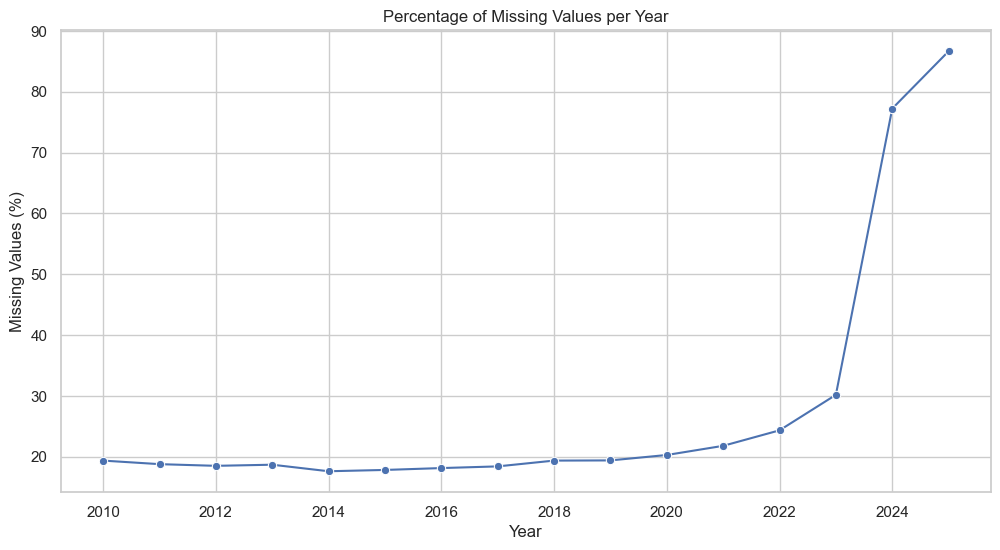

In [5]:
# Missing values trend per year
missing_per_year = (
    df.drop(columns=["year"])
      .isnull()
      .groupby(df["year"])
      .mean()
      .mean(axis=1) * 100
)

plt.figure(figsize=(12,6))
sns.lineplot(x=missing_per_year.index, y=missing_per_year.values, marker="o")
plt.title("Percentage of Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Missing Values (%)")
plt.show()

5. Distribution of key indicators

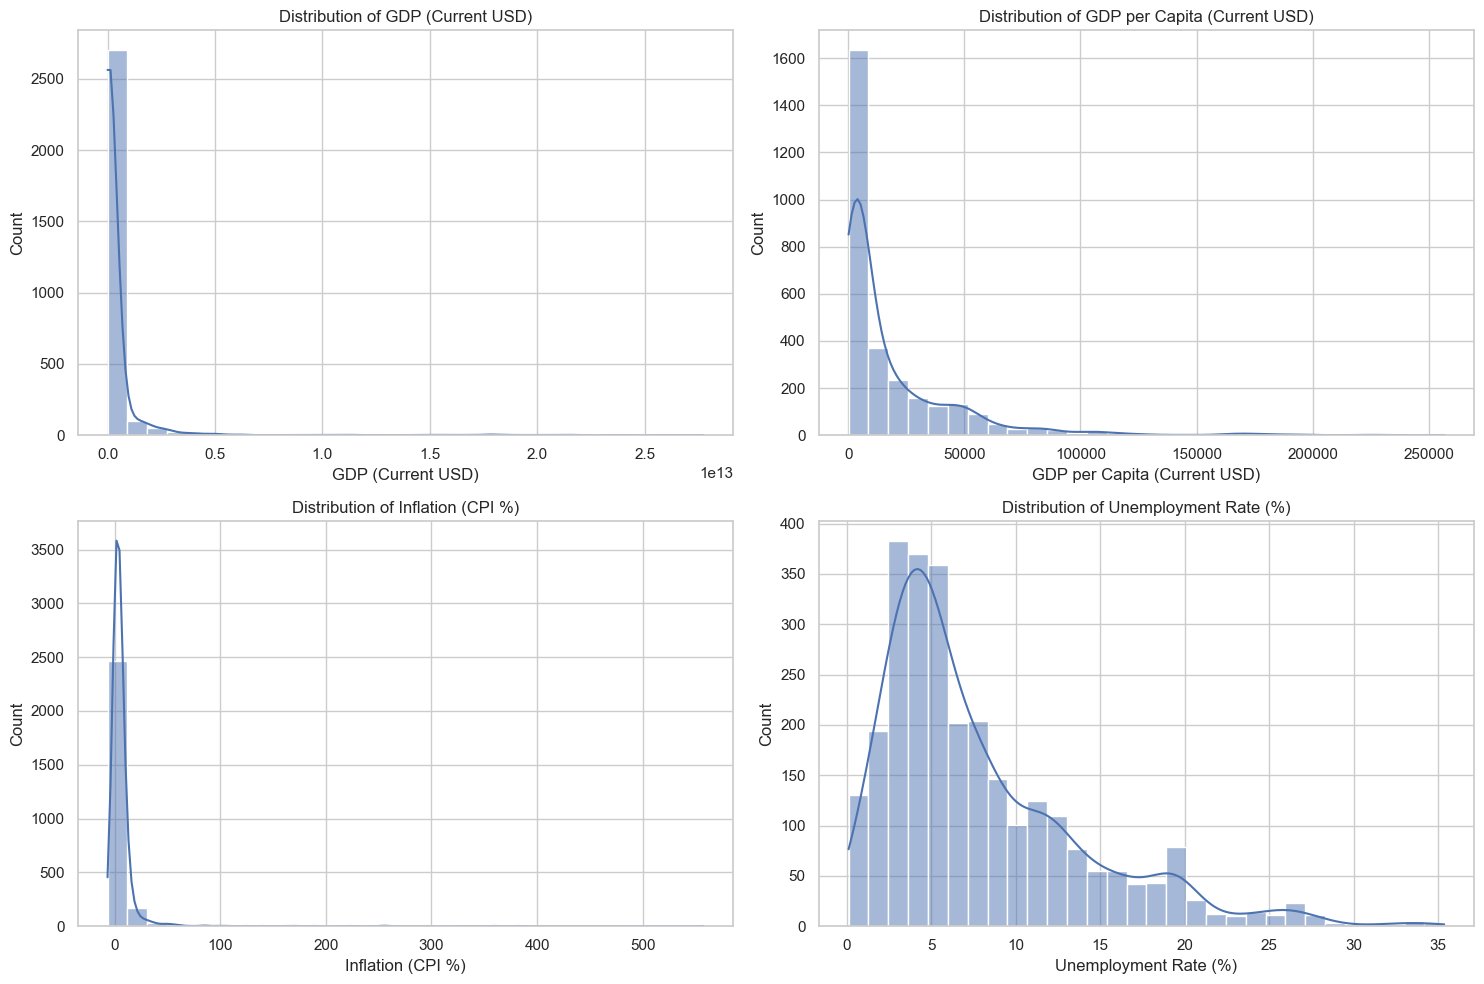

In [6]:
# Select indicators for distribution plots
indicators = [
    "GDP (Current USD)",
    "GDP per Capita (Current USD)",
    "Inflation (CPI %)",
    "Unemployment Rate (%)"
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(indicators, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

6. Correlation heatmap

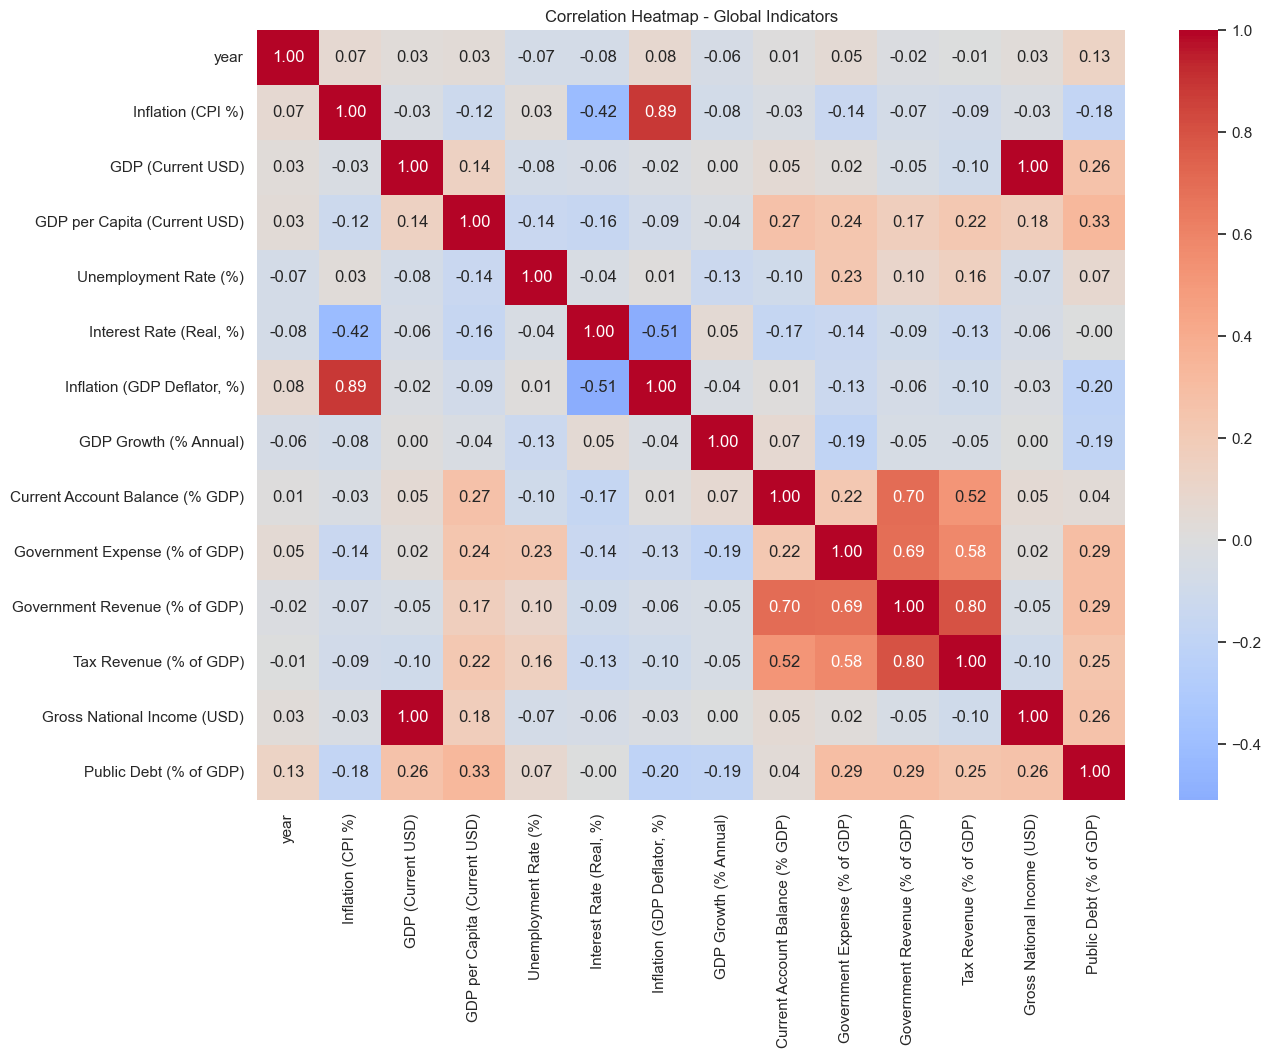

In [7]:
# Correlation across numeric indicators
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Global Indicators")
plt.show()

7. Global GDP trend

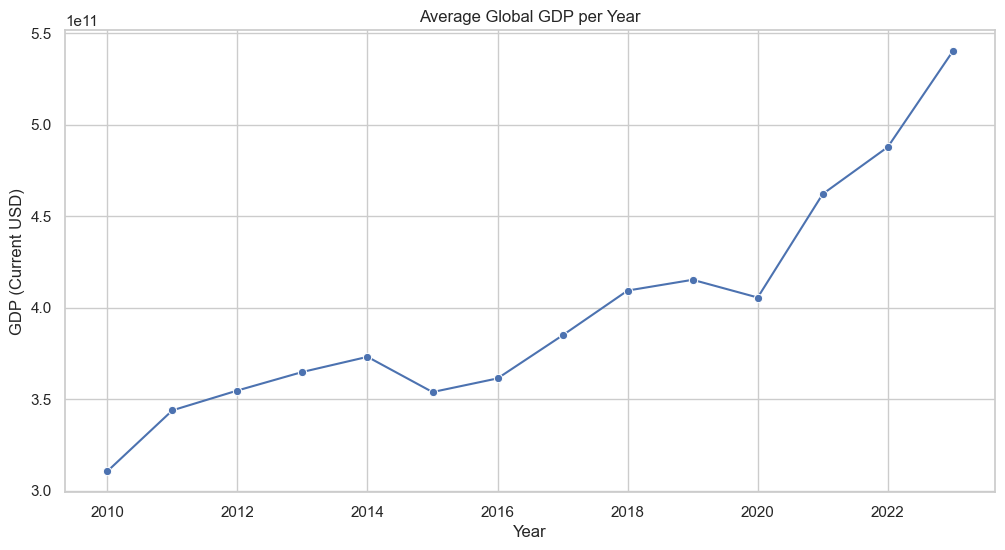

In [8]:
# Average global GDP per year
gdp_trend = df.groupby("year")["GDP (Current USD)"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=gdp_trend.index, y=gdp_trend.values, marker="o")
plt.title("Average Global GDP per Year")
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.show()

8. Top 10 countries by GDP per capita

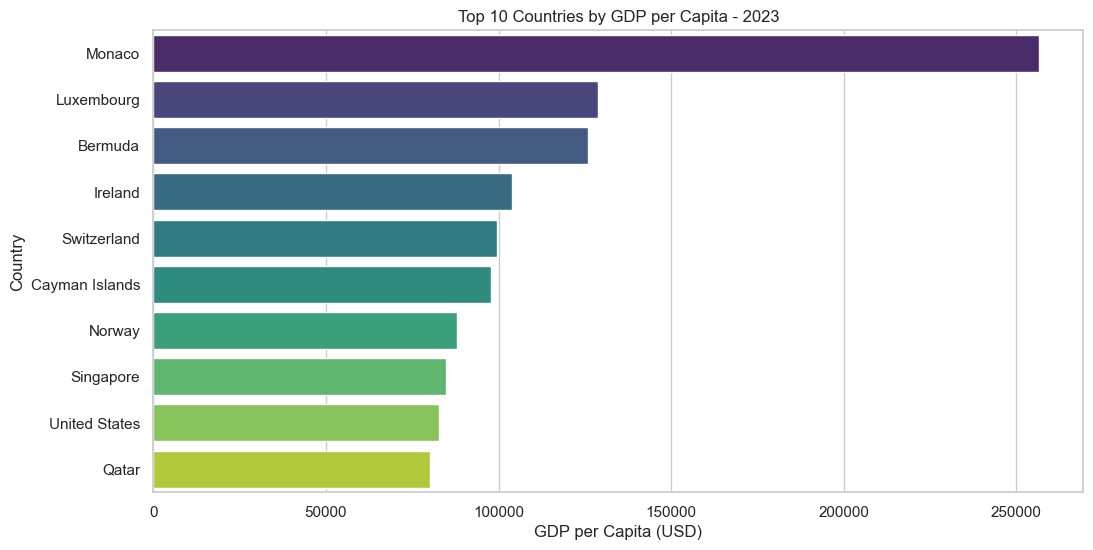

In [9]:
# Select latest year with valid data
latest_year = df.dropna(subset=["GDP per Capita (Current USD)"])["year"].max()
df_latest = df[df["year"] == latest_year]

# Select top 10 countries by GDP per capita
top10 = df_latest.nlargest(10, "GDP per Capita (Current USD)")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x="GDP per Capita (Current USD)",
    y="country_name",
    hue="country_name",      
    dodge=False,             
    palette="viridis",
    legend=False             
)
plt.title(f"Top 10 Countries by GDP per Capita - {latest_year}")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Country")
plt.show()

# Key Insights (so far)

- Data quality: Missing values increase sharply after 2023, so 2023 is used as the latest valid year for analysis.
- GDP per capita distribution: Highly skewed, with a small group of wealthy countries dominating the top ranks.
- Perspective matters: Total GDP and GDP per capita highlight different aspects - large economies are not always the richest per citizen.

These insights provide an initial picture of the dataset. To wrap up, here is a high-level conclusion from the analysis so far.

# Conclusion
- The World Bank dataset provides valuable insights into global economic indicators such as GDP, inflation, unemployment, and public debt.
- Data completeness becomes an important challenge - especially after 2023 where missing values increase significantly, limiting recent-year analysis.
- Exploratory analysis highlights both global trends (e.g., overall GDP growth) and structural imbalances (e.g., wealth concentrated in a few countries).
- Future steps may include handling missing values (imputation or external data sources), deeper regional comparisons, and predictive modeling for long-term economic forecasting.